# Unsupervised Learning

In the "Supervised Learning" notebook we introduced the idea of a "task" and we studied the family of supervised learning tasks, in which the goal is to learn some kind of mapping from labeled data. This description probably begs the question -- what if the data is unlabeled? Would we even be able to do anything with it? It turns out there are a number of things we can still learn about the data; algorithms that work with unlabeled data are called __unsupervised learning__ algorithms.

In unsupervised learning, the task is to learn something about the structure of the data. There are a lot of ways we can define the kind of "structure" that we want. For example, we could try to group data points into categories based on their values; this task is called __clustering__. As another example, we could take a high-dimensional dataset and try to respresent it somehow in 2D or 3D so that we can visualize it; this task is called __dimensionality reduction__. In this notebook we will look at these two tasks, as they are some of the most common in unsupervised learning. We will continue to use the Iris dataset and other toy datasets from scikit-learn and seaborn.

_Note: some code segments have TODO comments in them. These comments are optional exercises for you to modify the code in a useful way, however they are not meant to be restrictive. Feel free to modify the code in this notebook any way you like; it's a great way to practice your coding skills._

## Getting Started

You should have your own Anaconda virtual environment with all of the necessary Python modules installed. You can check by trying to import them:

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
import sklearn.cluster
import sklearn.datasets
import sklearn.decomposition
import sklearn.manifold
import sklearn.metrics
import sklearn.model_selection
import sklearn.neighbors
import sklearn.pipeline

## Clustering: Iris Dataset

So how would we "cluster" the Iris dataset? And why would we want to in the first place? After all, we already have the labels, so we already know what category each sample should belong to. As it turns out, this is a great way to evaluate a clustering algorithm -- if we put aside the labels and cluster the dataset using only the data, we can then compare the clusters identified by the algorithm with the original labels. Remember that one of the first questions we must ask before trying a supervised learning task is whether there is truly a pattern in the data, and clustering algorithms allow us to answer this question.

To do this we will take the entire dataset, use a clustering algorithm to identify cluster labels for each sample in the dataset, and then try to compare the labels to the true labels.

### K-Means Clustering

One of the most commonly-used clustering algorithms is __k-means clustering__, because it is fast and relatively easy to understand. The algorithm is as follows:

1. Select $k$ random samples from the dataset to be the initial means
2. Assign a label to each sample in the dataset according to the mean which is nearest to it
3. Update each mean to be the centroid of the samples in its cluster
4. Repeat steps 2 and 3 until the cluster labels converge

Here's an example from Wikipedia of k-means in action:

<center>
<img src="https://upload.wikimedia.org/wikipedia/commons/e/ea/K-means_convergence.gif" alt="kmeans" width="300" height="300"/>
</center>

This algorithm does seem to take the same approach to clustering that k-nearest neighbors takes to classification. In fact, it kind of has the same hyperparameters:
1. The number of clusters $k$
2. The distance function, which is used to find the nearest mean to a sample

As with kNN, we will use Euclidean distance by default. As for the number of clusters $k$, since we already know that the Iris dataset has three classes, we will use $k = 3$.

In [2]:
# load Iris dataset
iris = sklearn.datasets.load_iris()
X = iris.data
y = iris.target

# initialize k-means model
kmeans = sklearn.cluster.KMeans(n_clusters=3)

# fit the model to the dataset
kmeans.fit(X)

# compute cluster labels for the dataset
y_pred = kmeans.predict(X)

# show a side-by-side comparison of cluster labels and true labels
print(np.c_[y, y_pred])

[[0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [1 0]
 [1 0]
 [1 2]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 2]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [2 2]
 [2 0]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 0]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 0]
 [2 0]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 0]
 [2 2]
 [2 0]
 [2 2]
 [2 0]
 [2 2]
 [2 2]
 [2 0]
 [2 0]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 0]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 0]
 [2 2]
 [2 2]
 [2 2]
 [2 0]

It looks like the clustering model was able to cluster the dataset into the three classes, but there's one problem: the cluster indices don't necessarily match up to the class indices. In other words, the clustering model doesn't know what each cluster _is_, it only knows how the data points are clustered. What we need is a way to measure the _similarity_ of the cluster labels and the ground truth labels by accounting for permutations. One metric which provides this kind of measure is the __adjusted Rand index (ARI)__:

In [3]:
ari = sklearn.metrics.adjusted_rand_score(y, y_pred)

print('%0.3f' % (ari))

0.730


The ARI ranges from -1 to +1, where +1 is perfect similarity. We can also use the scatter plots we developed in the "Working with Data" notebook to visually compare the cluster labels with the ground truth labels:

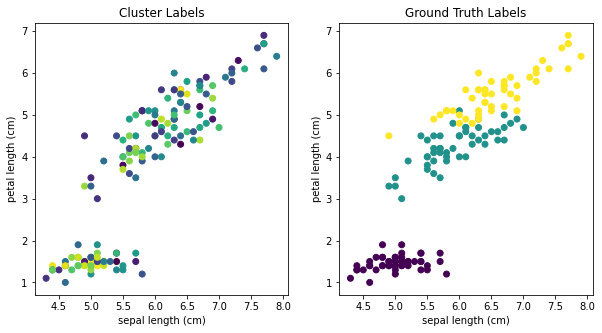

In [19]:
# define function to plot a slice of Iris dataset
def plot_iris_2d(iris, columns, labels):
    # extract x and y axes
    x, y = iris.data[:, columns[0]], iris.data[:, columns[1]]
    # plot x and y
    plt.scatter(x, y, c=labels)
    plt.xlabel(iris.feature_names[columns[0]])
    plt.ylabel(iris.feature_names[columns[1]])

# create side-by-side comparison of cluster labels and true labels
plt.subplots(1, 2, figsize=(10, 5))

plt.subplot(121)
plot_iris_2d(iris, [0, 2], y_pred)
plt.title('Cluster Labels')

plt.subplot(122)
plot_iris_2d(iris, [0, 2], iris.target)
plt.title('Ground Truth Labels')

plt.show()

# TODO: change the value of k and observe its effect on the ARI and the scatter plots

Now we can see where the clustering model "mis-clustered" data points. Note that the colors will match up only if the clustering model happened to assign clusters in the same order as the ground truth labels.

It seems like clustering is pretty easy when we have the ground truth labels. But what if we didn't? What if Ronald Fisher had neglected to label each flower that he measured? We would then have just a set of 150 flower measurements with no idea of the species of each flower. Could we use clustering to determine the species? The problem is that in this scenario we don't know the number of species -- in other words, we don't know the value of $k$. We could do a hyperparameter search on $k$, but how would we compare each model? The ARI won't help us here because, again, we don't have the ground truth labels.

In the absence of ground truth labels, the primary evaluation metric that we can use for k-means is __inertia__, or within-class scatter. The inertia is the sum of the variance in each cluster; a lower inertia generally corresponds to more coherent clusters, so we will seek a value of $k$ which minimizes the inertia:

In [5]:
# evaluate k-means for several values of k
k_values = range(1, 11)

for k in k_values:
    model = sklearn.cluster.KMeans(n_clusters=k)
    y_pred = model.fit_predict(X)
    
    print('k = %2d: %0.2f' % (k, model.inertia_))

C:\Users\ataas\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


k =  1: 681.37
k =  2: 152.35
k =  3: 78.85
k =  4: 57.23
k =  5: 46.46
k =  6: 39.04
k =  7: 34.31
k =  8: 30.06
k =  9: 28.27
k = 10: 26.29


Hmm... it seems like the inertia just keeps decreasing as $k$ increases. Well, the largest possible value of $k$ is the number of data points, so let's try that:

In [6]:
k = iris.data.shape[0]
model = sklearn.cluster.KMeans(n_clusters=k)
y_pred = model.fit_predict(X)

print('k = %2d: %0.2f' % (k, model.inertia_))

k = 150: 0.00


C:\Users\ataas\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1077: ConvergenceWarning: Number of distinct clusters (149) found smaller than n_clusters (150). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_


If we assume that there are as many clusters as there are data points, we effectively assign each data point to its own cluster. Since each cluster then has only one data point, the variance of each cluster is 0 and so the total variance, or inertia, is also 0. But this result is not helpful to us. It turns out that the inertia has an inherent __bias__ toward more complex models. The most common way to deal with this bias is to use what's called the __elbow method__, which is best explained with a plot:

C:\Users\ataas\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


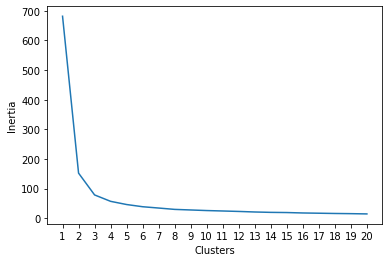

In [7]:
def evaluate_kmeans(k):
    model = sklearn.cluster.KMeans(n_clusters=k)
    model.fit_predict(X)
    
    return model.inertia_

x = range(1, 21)
y = [evaluate_kmeans(k) for k in x]

plt.plot(x, y)
plt.xticks(x)
plt.xlabel('Clusters')
plt.ylabel('Inertia')
plt.show()

As the plot shows, even though the inertia decreases indefinitely, it also begins to level off, creating an "elbow". The elbow method takes the value of $k$ at which this elbow occurs to be the best value of $k$. The idea is that this value gives us the best "bang for our buck" -- the simplest model at which the minimum inertia occurs (more or less). But where exactly does the elbow occur? Is it 3? Or 4? Unfortunately, the elbow method isn't an exact method. But can we really be upset? After all, without ground truth labels, the number of clusters in a dataset is quite subjective:

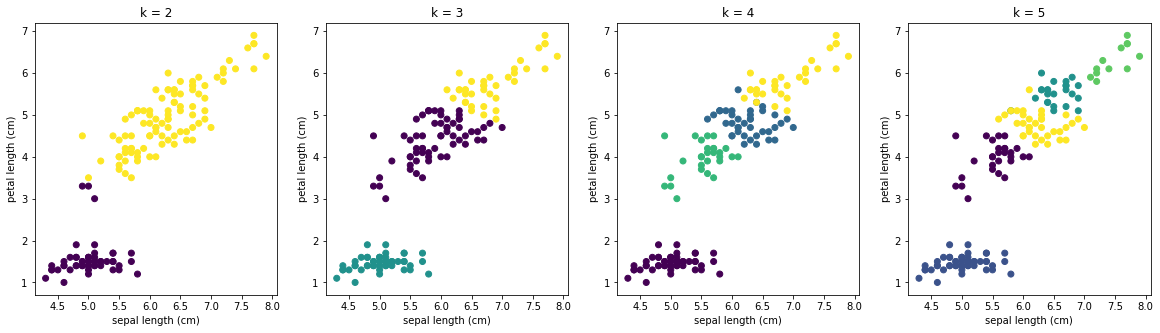

In [8]:
k_values = [2, 3, 4, 5]

plt.subplots(1, len(k_values), figsize=(5 * len(k_values), 5))

for i in range(len(k_values)):
    k = k_values[i]
    model = sklearn.cluster.KMeans(n_clusters=k)
    labels = model.fit_predict(X)
    
    plt.subplot(1, len(k_values), i + 1)
    plot_iris_2d(iris, [0, 2], labels)
    plt.title('k = %d' % (k))

plt.show()

How many clusters do you see? Can you tell which plot is the most "correct"? Clustering becomes much more difficult when we don't have ground truth labels or the number of clusters, because we don't have an objective way to select the best model. This issue pervades virtually every clustering algorithm in existence: __what is the right number of clusters for a dataset__? The philosophical answer is that there is no such thing! Clustering is unsupervised learning; in other words, we don't know what we're looking for. The best we can do is to hand-craft our own metrics based on ideas like inertia, and to use what hints we can get from the task we are trying to do.

For a more in-depth overview of k-means and the many other clustering algorithms out there, we refer you to the [scikit-learn documentation](http://scikit-learn.org/stable/modules/clustering.html#clustering). Feel free to try out some of these algorithms yourself on the Iris dataset! A good algorithm to try first is the __Gaussian mixture model__, which is very similar to k-means.

## Dimensionality Reduction: Digits Dataset

We have seen many times by now that datasets tend to have a lot of features, almost always more than 2 or 3, which prevents us from being able to visualize them wholistically. Furthermore, as the number of features in a dataset increases, it becomes harder to extract useful information from the data, to separate "signal" from "noise", so to speak. We call this phenomenon the __curse of dimensionality__. It is especially true for image datasets, since images can easily contain thousands of pixels. Dimensionality reduction techniques can help us with both of these problems: we can transform a dataset into 2 or 3 dimensions for __visualization__, or more generally we can perform __feature extraction__, in which we transform a dataset into some lower-dimensional space that should contain more signal and less noise.

To present these techniques we will use the digits dataset provided by scikit-learn. This dataset consists of 8x8 grayscale images of handwritten digits. We'll go ahead and load the dataset:

In [9]:
# load the digits dataset
digits = sklearn.datasets.load_digits()

# print dataset stats
print('X: (%d, %d)' % digits.data.shape)
print('y: (%d,)' % digits.target.shape)
print('label names:', digits.target_names)

X: (1797, 64)
y: (1797,)
label names: [0 1 2 3 4 5 6 7 8 9]


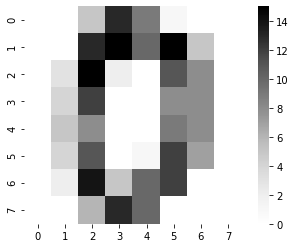

In [10]:
sns.heatmap(digits.images[0], square=True, cmap='Greys')
plt.show()

These images are very small, and they use only 16 shades of grey. Later on we will look at another dataset of handwritten digits which is much more widely-known, and much larger. But for now this dataset will suffice.

### Principal Component Analysis (PCA)

PCA is a classic dimensionality reduction technique. It has been used for all sorts of things, including visualization, pattern recognition, data compression... and so on. PCA computes the __principal components__ of a dataset. In mathematical terms, the principal components of a dataset $X$ are the eigenvectors of the covariance of $X$:

$$W_{pca} = V,$$
$$\Sigma = X X^T = V U V^T$$

Intuitively, the principal components of a dataset are the axes along which the variance of the dataset is maximized. They are essentially just features, based on the original features of the dataset. A dataset can have as many principal components as it has features, but we typically only take the $N$ most relevant principal components; this truncation is how we reduce the dimensionality of the data. In particular, we use the (truncated) principal component matrix to project each sample $\vec{x}$ into a lower-dimensional space:

$$\vec{x}_{proj} = W_{pca} \vec{x}$$

Here's a real-world example. You're in a classroom filled with students, and you want to create a system that can distinguish between each individual student using a set of features. You can use whatever features you want: gender, age, height, weight, skin color, hair color, beard, glasses, clothing, nationality... anything. In this situation, the most __salient__ or useful features would be the ones for which there is a lot of variation between individuals; for example, gender wouldn't be a very useful feature in a room full of guys, but nationality would be very useful in a room full of people from many different nations. In other words, you want the features which exhibit the greatest __variance__ in your dataset of people. PCA attempts to find these features, except that it is not limited to the features themselves; it can also compute new features by using linear combinations of the original features.

Now let's try to understand how PCA works with some code:

In [11]:
# get the data matrix from the digits dataset
X = digits.data

# create PCA model
pca = sklearn.decomposition.PCA()

# compute principal components of X
pca.fit(X)

# print stats
print(pca.components_.shape)

(64, 64)


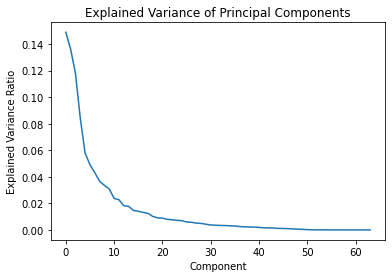

In [12]:
# plot the explained variance of each principal component
x = range(pca.n_components_)
y = pca.explained_variance_ratio_

plt.plot(x, y)
plt.title('Explained Variance of Principal Components')
plt.xlabel('Component')
plt.ylabel('Explained Variance Ratio')
plt.show()

In the above code we simply compute the principal components of the digits dataset and we plot the explained variance of each component. Components with the highest explained variance are the "salient features" that we were talking about; in this case, the first principal component contains nearly 15% of the variance of the entire dataset. Notice that the components are sorted by their explained variance, which makes it easy to take the $n$ components with the most variance:

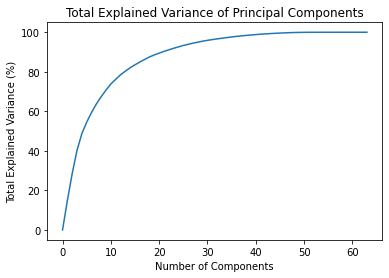

In [13]:
# plot the total variance contained within the first n components
x = range(pca.n_components_)
y = [100 * sum(pca.explained_variance_ratio_[:n]) for n in x]

plt.plot(x, y)
plt.title('Total Explained Variance of Principal Components')
plt.xlabel('Number of Components')
plt.ylabel('Total Explained Variance (%)')
plt.show()

Earlier we presented the idea of separating the signal from the noise in a dataset; variance is one of the simplest ways to determine where such signal occurs. Much of the useful information in a dataset is in its variations; if we can capture most of a dataset's variance with only a subset of features, we can essentially filter out much of the noise without losing very much signal. In this example, we can take the first 20 components, which reduces the dataset from 64 dimensions to 20 dimensions, and still retain roughly 90% of the information in the dataset. This reduction is useful from two perspectives: on the one hand, we have found a more compact representation of the data (sort of like lossy compression), and on the other hand, we have found features that may be more useful for tasks such as classification.

In fact, let's try it -- let's create a classifier and see if using PCA as a preprocessing step improves classification accuracy:

In [14]:
# define a function to evaluate a kNN classifier (with optional PCA)
def evaluate_model(X_train, X_test, y_train, y_test, n_pca=0):
    # create the model
    model = None

    if n_pca != 0:
        # if n_pca is specified then create a PCA/kNN model
        model = sklearn.pipeline.Pipeline([
            ('pca', sklearn.decomposition.PCA(n_components=n_pca)),
            ('knn', sklearn.neighbors.KNeighborsClassifier(1))
        ])
    else:
        # otherwise just use kNN
        model = sklearn.neighbors.KNeighborsClassifier(1)

    # train the model
    model.fit(X_train, y_train)
    
    # evaluate the model
    return model.score(X_test, y_test)

# create train and test sets
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(digits.data, digits.target, test_size=0.3)

# compare the accuracy of several classifiers by varying the number of principal components
# a value of 0 means don't use PCA
pca_values = [1, 5, 10, 20, 64, 0]

for n_pca in pca_values:
    accuracy = 100 * evaluate_model(X_train, X_test, y_train, y_test, n_pca)

    print('Accuracy (n_pca = %2d): %5.1f%%' % (n_pca, accuracy))

Accuracy (n_pca =  1):  31.1%
Accuracy (n_pca =  5):  90.4%
Accuracy (n_pca = 10):  98.1%
Accuracy (n_pca = 20):  98.7%
Accuracy (n_pca = 64):  98.3%
Accuracy (n_pca =  0):  98.3%


Well, we didn't really _improve_ the accuracy. The thing is that this dataset is simple enough that kNN can do quite well on its own; to really test the benefit of PCA we would need a more complex dataset, one where kNN doesn't get 98% accuracy out of the box. The more important result here is that _we maintained the same level of accuracy using fewer dimensions_ -- the first 20 principal components provides the same level of classification potential as the original 64 features.

We can also use principal components to visualize the dataset. Remember, principal components are like axes, so we can pick any two principal components and project each data point onto them:

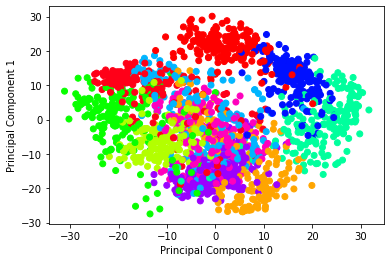

In [15]:
# select two principal components by index
indices = [0, 1]

# project each data point onto the selected axes
X_proj = pca.transform(X)

x, y = X_proj[:, indices[0]], X_proj[:, indices[1]]

# plot the projected data
plt.scatter(x, y, c=digits.target, cmap='hsv')
plt.xlabel('Principal Component %d' % (indices[0]))
plt.ylabel('Principal Component %d' % (indices[1]))
plt.show()

# TODO: try to find the pair of principal components that best separate the colors

We went ahead and colored each data points by class. Remember that this dataset consists of images of handwritten digits, so each data point is an image and the class denotes which digit it is. But even with the first two components, the 10 classes are still pretty mixed up. We could separate the classes pretty well if we could use more components -- we know this from the classification experiment that we just ran -- but when we're limited to only two components it's hard to get good class separation. For this reason, PCA is generally pretty limited as a visualization tool, unless the first two components have a very high explained variance.

### t-distributed Stochastic Neighbor Embedding (t-SNE)

When it comes to visualizing high-dimensional data, t-SNE is hands-down the most widely-used tool, and arguably the most effective. It is also way more complicated mathematically so we won't even begin to try and explain it. Just know that it can take your high-dimensional dataset and magically put it into 2D or 3D space. Observe:

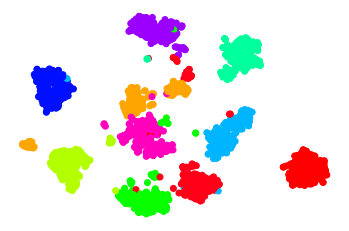

In [16]:
# get the data matrix from the digits dataset
X = digits.data

# compute t-SNE of X
X_embedded = sklearn.manifold.TSNE(n_components=2).fit_transform(X)

x, y = X_embedded[:, 0], X_embedded[:, 1]

# plot the embedded data
plt.axis('off')
plt.scatter(x, y, c=digits.target, cmap='hsv')
plt.show()

# TODO: can you plot t-SNE in 3D?

Wow. Look at that class separation.

Unlike PCA, t-SNE can't really be used for feature extraction; it just takes a data matrix and transforms it directly into an embedded space. Additionally, if your data has a really large number of features, like thousands or more, you should use another dimensionality reduction method (like PCA) to reduce the data to something on the order of 50 features before using t-SNE, both for better performance and better results.

For more information on t-SNE, check out [this article](https://distill.pub/2016/misread-tsne/) which explains how to interpret a t-SNE plot correctly.

_One final thought about dimensionality reduction:_ although it is a particular subtopic within machine learning, in many ways dimensionality reduction is the goal of all machine learning techniques. Whether it is computing summary statistics, fitting a model to a dataset, identifying clusters, or actually reducing a dataset into a few dimensions, all of these techniques seek to transform a (potentially huge) dataset into a few key numbers that describe the dataset with high fidelity. So as you continue to learn about new machine learning techniques, consider how they all serve this one goal in some way or another.

## Assignment: With a Little Help from My Friends

One of the main takeaways of unsupervised learning algorithms is that they can be used to improve other learning algorithms, such as the PCA/kNN example. Can you use one of the unsupervised learning algorithms discussed in this notebook to "help" another algorithm? Here are some examples to get you started:
- use clustering to "validate" a classifier on a classification dataset
- use PCA to improve the accuracy of a classifier
- use PCA to improve t-SNE visualization of a dataset
- use t-SNE to visualize a regression dataset (numerical labels vs categorical labels)